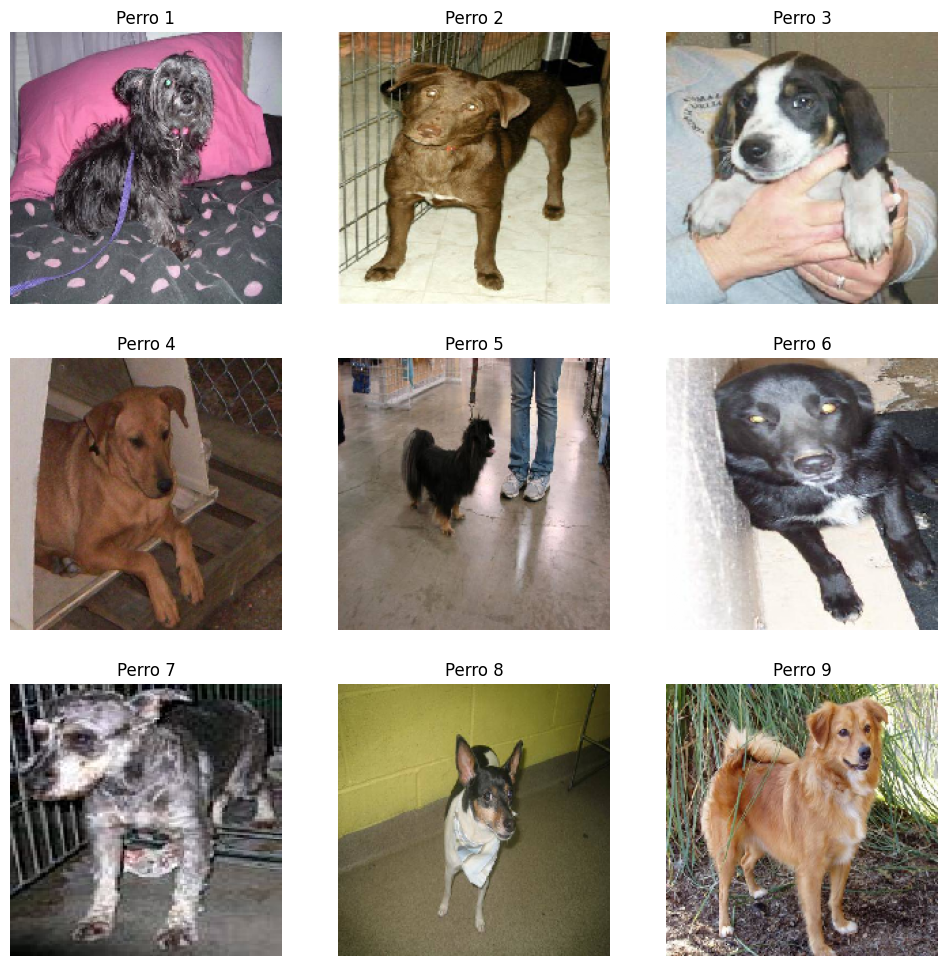

In [1]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import numpy as np
import shutil

data_dir = '../data/raw/train'
subfolder_dog = os.path.join(data_dir, 'dog')

imangens_perros = os.listdir(subfolder_dog)

dog_images = []

for i in range(9):
    ruta_imagen = os.path.join(subfolder_dog, imangens_perros[i])
    img = image.load_img(ruta_imagen, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalizar la imagen
    dog_images.append(img_array)

plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot (3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.axis('off')
    plt.title('Perro {}'.format(i + 1))
plt.show()


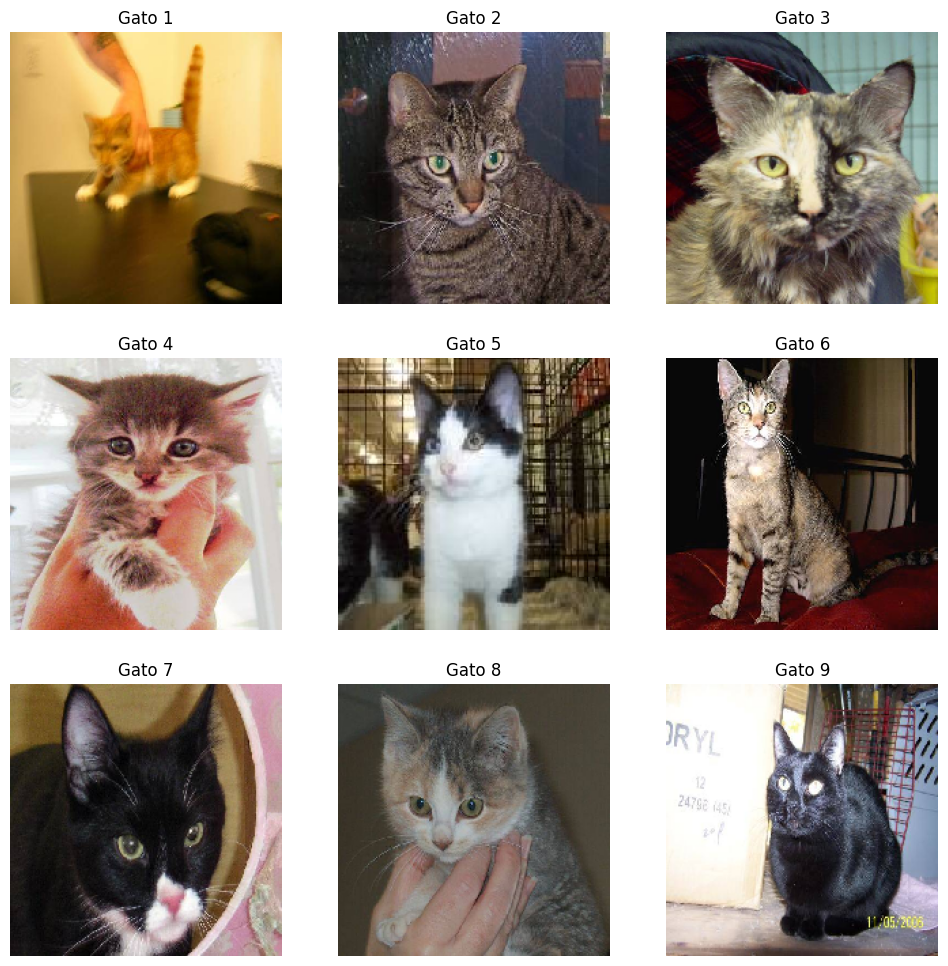

In [2]:
subfolder_cat = os.path.join(data_dir, 'cat')
imangens_gatos = os.listdir(subfolder_cat)

cat_images = []

for i in range(9):
    ruta_imagen = os.path.join(subfolder_cat, imangens_gatos[i])
    img = image.load_img(ruta_imagen, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalizar la imagen
    cat_images.append(img_array)

plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot (3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.axis('off')
    plt.title('Gato {}'.format(i + 1))
plt.show()


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '../data/raw/train'
test_dir = '../data/raw'
size = (200, 200)

datagen_train = ImageDataGenerator()
datagen_test = ImageDataGenerator()

data_train = datagen_train.flow_from_directory(
    train_dir,
    target_size= size,
    classes = ['cat', 'dog'],
)

data_test = datagen_test.flow_from_directory(
    test_dir,
    target_size= size,
    classes = ['test1']

)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

c:\Users\felip\repos\deep_learing_ds3-1\deep_learing_ds3\tf-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
#compilar el modelo

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from tensorflow.keras.losses import SparseCategoricalCrossentropy

#model.compile(optimizer = Adam(learning_rate = 0.001), loss = SparseCategoricalCrossentropy(), metrics = ["accuracy"])
model.compile(optimizer = Adam(learning_rate = 0.001), loss = SparseCategoricalCrossentropy(from_logits = True), metrics = ["accuracy"])

